In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')
import nltk

In [2]:
# Load files 2018,2019,2020 and 2021
da18 = pd.read_excel('2018.xlsx')
da19 = pd.read_excel('2019.xlsx')
da20 = pd.read_excel('2020.xlsx')
da21 = pd.read_excel('2021.xlsx')

In [3]:
# Format date type
da18['End Date'] = pd.to_datetime(da18['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da19['End Date'] = pd.to_datetime(da19['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da20['End Date'] = pd.to_datetime(da20['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da21['End Date'] = pd.to_datetime(da21['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)

In [4]:
# Rename conductor feedback
da18.rename(columns = {'Are there any other comments you would like to make about the value of the Choir to you?':'conductorfeedback'},inplace = True)
da19.rename(columns = {'3.Is there anything that you particularly like about the choir?':'conductorfeedback'},inplace = True)
da20.rename(columns = {'Do you have any feedback for us about our live sessions?':'conductorfeedback'},inplace = True)
da21.rename(columns = {'9. What is the best thing about the choir? ___________':'conductorfeedback'},inplace = True)

In [6]:
da19_clean = da19['conductorfeedback'].dropna()

In [7]:
da19_clean = da19_clean.reset_index()
da19_clean = da19_clean.drop(columns=['index'])

In [8]:
# 4.Topic modelling
from nltk.stem import PorterStemmer
import re

In [10]:
#Data Cleaning by removing punctuations, numbers, special characters, and short words
documents = da19_clean['conductorfeedback']
Cleaned_doc = []
for r in range(len(documents)):
    tweet = documents[r]
    try:
        tweet = re.sub('[^A-Za-z]', ' ', tweet) #removing everything except alphabets
        tweet = tweet.lower() #lowercase
        Tokens = tweet.split() #tokenization
        Filtered_token = [w for w in Tokens if len(w)>3] # removing short words
        tweet = ' '.join(Filtered_token) 
    except:
        continue
#Save cleaned text
    Cleaned_doc.append(tweet) 
    print('-[Tweet Text]: ', tweet)

-[Tweet Text]:  inclusive nature
-[Tweet Text]:  enjoy singing with friends really like pianist master show very inclusive people local community
-[Tweet Text]:  informality friendly atmosphere
-[Tweet Text]:  conductor unflagging enthusiasm ability bring best that thereus
-[Tweet Text]:  informality lack demand
-[Tweet Text]:  friends feeling like might belong
-[Tweet Text]:  diverse backgrounds coming together feeling like belong something special weekly mindfulness
-[Tweet Text]:  people fact that number choir members have joined street advertising frame commitment choir each other which built over time lack auditions prerequisite becoming member
-[Tweet Text]:  inclusiveness
-[Tweet Text]:  learning different singing range
-[Tweet Text]:  good learn different songs
-[Tweet Text]:  singing feeling camaraderie
-[Tweet Text]:  wonderfully talented conductor makes singing learning things every week
-[Tweet Text]:  songs sing cater everyone group
-[Tweet Text]:  conductor
-[Tweet Text]:

In [11]:
#Remove the stop-words from the text data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words = ['https','because','please','very','thank','call','watch','look','today','something','someone',
 'anyone','anything','everyone','everything','thanks','care','thing','doesn','things']
# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
            each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item) 
    print('-[Cleaned Text]: ', Cleaned_doc[r])

-[Cleaned Text]:  inclusive nature
-[Cleaned Text]:  enjoy singing with friends really like pianist master show inclusive people local community
-[Cleaned Text]:  informality friendly atmosphere
-[Cleaned Text]:  conductor unflagging enthusiasm ability bring best that thereus
-[Cleaned Text]:  informality lack demand
-[Cleaned Text]:  friends feeling like might belong
-[Cleaned Text]:  diverse backgrounds coming together feeling like belong special weekly mindfulness
-[Cleaned Text]:  people fact that number choir members have joined street advertising frame commitment choir each other which built over time lack auditions prerequisite becoming member
-[Cleaned Text]:  inclusiveness
-[Cleaned Text]:  learning different singing range
-[Cleaned Text]:  good learn different songs
-[Cleaned Text]:  singing feeling camaraderie
-[Cleaned Text]:  wonderfully talented conductor makes singing learning every week
-[Cleaned Text]:  songs sing cater group
-[Cleaned Text]:  conductor
-[Cleaned Text]

In [12]:
#Select only nouns
Cleaned_doc_noun = Cleaned_doc
for r in range(len(Cleaned_doc_noun)):
    lines = Cleaned_doc[r]
# function to test if something is a noun
    is_noun = lambda pos: pos[:2] == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'
 # do the nlp stuff
    tokenized = nltk.word_tokenize(lines)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
    Cleaned_doc_noun[r] = ' '.join(nouns) 
    print('-[Cleaned Text Noun]: ', Cleaned_doc_noun[r])

-[Cleaned Text Noun]:  nature
-[Cleaned Text Noun]:  enjoy friends pianist master people community
-[Cleaned Text Noun]:  informality
-[Cleaned Text Noun]:  conductor ability bring thereus
-[Cleaned Text Noun]:  informality lack demand
-[Cleaned Text Noun]:  friends
-[Cleaned Text Noun]:  backgrounds mindfulness
-[Cleaned Text Noun]:  people fact number choir members street advertising choir time auditions member
-[Cleaned Text Noun]:  inclusiveness
-[Cleaned Text Noun]:  singing range
-[Cleaned Text Noun]:  learn songs
-[Cleaned Text Noun]:  feeling camaraderie
-[Cleaned Text Noun]:  conductor week
-[Cleaned Text Noun]:  songs cater group
-[Cleaned Text Noun]:  conductor
-[Cleaned Text Noun]:  ability people chance meet
-[Cleaned Text Noun]:  range people unity
-[Cleaned Text Noun]:  community engagement choir leader
-[Cleaned Text Noun]:  friendships
-[Cleaned Text Noun]:  conductor choir members
-[Cleaned Text Noun]:  sense community
-[Cleaned Text Noun]:  community vibe
-[Cleaned T

-[Cleaned Text Noun]:  enjoy
-[Cleaned Text Noun]:  love feeling part group people
-[Cleaned Text Noun]:  people
-[Cleaned Text Noun]:  others head friends
-[Cleaned Text Noun]:  
-[Cleaned Text Noun]:  songs
-[Cleaned Text Noun]:  
-[Cleaned Text Noun]:  music messages
-[Cleaned Text Noun]:  
-[Cleaned Text Noun]:  conductor approach singing
-[Cleaned Text Noun]:  convenient location songs
-[Cleaned Text Noun]:  participants conductor enthusiasm
-[Cleaned Text Noun]:  neighbours
-[Cleaned Text Noun]:  director organiser leaders
-[Cleaned Text Noun]:  people
-[Cleaned Text Noun]:  conductor mindedness
-[Cleaned Text Noun]:  patient conductor
-[Cleaned Text Noun]:  music tastes director choirmaster
-[Cleaned Text Noun]:  friendliness people
-[Cleaned Text Noun]:  people
-[Cleaned Text Noun]:  feel part community heart
-[Cleaned Text Noun]:  range songs genre dillon conductor choir leader
-[Cleaned Text Noun]:  supportive
-[Cleaned Text Noun]:  friends master
-[Cleaned Text Noun]:  condu

In [ ]:
# 4.2 Term document matrix

In [13]:
#Fit and transform the processed titles
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer() 
count_data = count_vectorizer.fit_transform(Cleaned_doc_noun)
count_data

<300x323 sparse matrix of type '<class 'numpy.int64'>'
	with 850 stored elements in Compressed Sparse Row format>

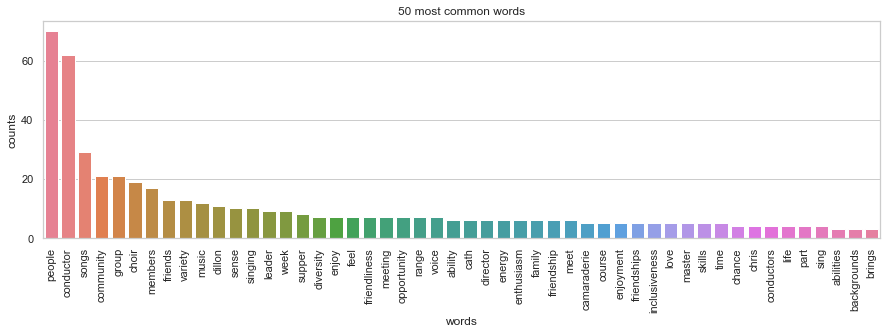

In [14]:
#Visualise most common words
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

terms = count_vectorizer.get_feature_names()
# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]
count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50] #Take the top 50 words
 
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
 
plt.figure(2, figsize=(15, 4))
plt.subplot(title='50 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

In [ ]:
# 4.3/ Term selection

In [15]:
#Remove highly frequent as from above graph and infrequent words from the Dataset
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 30 and total_counts[t] > 1:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex] 
ReducedCount

Number of Terms Remained:  107


<300x107 sparse matrix of type '<class 'numpy.int64'>'
	with 508 stored elements in Compressed Sparse Row format>

In [16]:
#4.4. Topic number

In [17]:
#Install Gensim package
!pip install Cython
!pip install gensim

In [18]:
#Data Preparation
Cleaned_doc_noun_new = []
print('CLEANED TEXT NEW: ')
for r in range(len(Cleaned_doc_noun)):
    each_item = []
    for t in Cleaned_doc_noun[r].split():
 #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
            each_item.append(t)
    Cleaned_doc_noun_new.append(each_item) 
    print(Cleaned_doc_noun_new[r])

CLEANED TEXT NEW: 
['nature']
['enjoy', 'friends', 'master', 'community']
['informality']
['ability']
['informality']
['friends']
['backgrounds']
['fact', 'choir', 'members', 'street', 'choir', 'time', 'auditions']
['inclusiveness']
['singing', 'range']
['learn', 'songs']
['feeling', 'camaraderie']
['week']
['songs', 'group']
[]
['ability', 'chance', 'meet']
['range']
['community', 'engagement', 'choir', 'leader']
['friendships']
['choir', 'members']
['sense', 'community']
['community']
['friendship', 'camaraderie', 'group']
[]
[]
['group']
[]
['singing', 'songs', 'supper']
['singing']
['sense', 'camaraderie', 'choir', 'cath', 'mundy', 'support', 'cath', 'enthusiasm', 'acceptance']
['building', 'street']
['abilities', 'leader']
['enjoyment']
['dillon']
['songs', 'conductors']
['interest']
['choir']
['tips']
[]
[]
['week']
['conductors', 'choices', 'songs']
['group']
[]
[]
['choir']
['voice']
['inclusiveness']
['friends', 'songs']
[]
['time', 'songs']
['inclusiveness', 'friendliness']
[

In [19]:
import gensim.corpora as corpora
# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_noun_new)
print(id2word.token2id)

{'nature': 0, 'community': 1, 'enjoy': 2, 'friends': 3, 'master': 4, 'informality': 5, 'ability': 6, 'backgrounds': 7, 'auditions': 8, 'choir': 9, 'fact': 10, 'members': 11, 'street': 12, 'time': 13, 'inclusiveness': 14, 'range': 15, 'singing': 16, 'learn': 17, 'songs': 18, 'camaraderie': 19, 'feeling': 20, 'week': 21, 'group': 22, 'chance': 23, 'meet': 24, 'engagement': 25, 'leader': 26, 'friendships': 27, 'sense': 28, 'friendship': 29, 'supper': 30, 'acceptance': 31, 'cath': 32, 'enthusiasm': 33, 'mundy': 34, 'support': 35, 'building': 36, 'abilities': 37, 'enjoyment': 38, 'dillon': 39, 'conductors': 40, 'interest': 41, 'tips': 42, 'choices': 43, 'voice': 44, 'friendliness': 45, 'director': 46, 'piano': 47, 'quality': 48, 'part': 49, 'sing': 50, 'brings': 51, 'energy': 52, 'chris': 53, 'coordinator': 54, 'variety': 55, 'attitude': 56, 'song': 57, 'opportunity': 58, 'perform': 59, 'skills': 60, 'life': 61, 'diversity': 62, 'attendance': 63, 'atmosphere': 64, 'welcoming': 65, 'differen

In [20]:
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_noun_new]
print(Corpus)

[[(0, 1)], [(1, 1), (2, 1), (3, 1), (4, 1)], [(5, 1)], [(6, 1)], [(5, 1)], [(3, 1)], [(7, 1)], [(8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1)], [(14, 1)], [(15, 1), (16, 1)], [(17, 1), (18, 1)], [(19, 1), (20, 1)], [(21, 1)], [(18, 1), (22, 1)], [], [(6, 1), (23, 1), (24, 1)], [(15, 1)], [(1, 1), (9, 1), (25, 1), (26, 1)], [(27, 1)], [(9, 1), (11, 1)], [(1, 1), (28, 1)], [(1, 1)], [(19, 1), (22, 1), (29, 1)], [], [], [(22, 1)], [], [(16, 1), (18, 1), (30, 1)], [(16, 1)], [(9, 1), (19, 1), (28, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1)], [(12, 1), (36, 1)], [(26, 1), (37, 1)], [(38, 1)], [(39, 1)], [(18, 1), (40, 1)], [(41, 1)], [(9, 1)], [(42, 1)], [], [], [(21, 1)], [(18, 1), (40, 1), (43, 1)], [(22, 1)], [], [], [(9, 1)], [(44, 1)], [(14, 1)], [(3, 1), (18, 1)], [], [(13, 1), (18, 1)], [(14, 1), (45, 1)], [(46, 1), (47, 1), (48, 1)], [(22, 1), (49, 1)], [(9, 1), (44, 1)], [], [(9, 1), (21, 1), (50, 1)], [(1, 1), (22, 1), (28, 1), (51, 1), (52, 1)], [(9, 1), (53, 1), (54, 1

In [21]:
#Gensim LDA Model
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint
#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
 id2word=id2word,
num_topics=15,
random_state=100)
#Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

[(0,
  '0.079*"community" + 0.079*"meeting" + 0.041*"conductors" + 0.041*"family" + '
  '0.041*"inclusivity" + 0.041*"work" + 0.041*"mundy" + 0.041*"rehearsals" + '
  '0.041*"cath" + 0.041*"attitude"'),
 (1,
  '0.171*"songs" + 0.062*"variety" + 0.050*"diversity" + 0.037*"director" + '
  '0.037*"choir" + 0.037*"dillon" + 0.037*"community" + 0.037*"week" + '
  '0.025*"inclusivity" + 0.025*"piano"'),
 (2,
  '0.079*"group" + 0.048*"music" + 0.048*"opportunity" + 0.048*"love" + '
  '0.048*"feel" + 0.048*"voice" + 0.032*"life" + 0.032*"members" + '
  '0.032*"week" + 0.032*"community"'),
 (3,
  '0.064*"music" + 0.064*"choir" + 0.033*"group" + 0.033*"company" + '
  '0.033*"participants" + 0.033*"chance" + 0.033*"work" + 0.033*"diversity" + '
  '0.033*"energy" + 0.033*"members"'),
 (4,
  '0.093*"voice" + 0.048*"night" + 0.048*"group" + 0.048*"atmosphere" + '
  '0.048*"course" + 0.048*"community" + 0.048*"energy" + 0.048*"welcoming" + '
  '0.048*"others" + 0.048*"environment"'),
 (5,
  '0.092*"c

In [22]:
#Compute topic coherence sore
from gensim.models import CoherenceModel
# Compute Coherence Score. Note: that CoherenceModel require 
# text input format (Cleaned_doc_new) instead of bag of word 
coherence_model_lda = CoherenceModel(model=lda_model, 
 texts=Cleaned_doc_noun_new, 
dictionary=id2word, 
coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6152722510044524


In [23]:
#Experiment with Topic Numbers
#Evaluation models with topics numbers from 2 to 10
Topics = list(range(2,16,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
 lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
 id2word=id2word,
num_topics=top,
random_state=100)
 #Keep the trained models
 Trained_Models.append(lda_model)
 #Compute coherence score for each model
 coherence_model_lda = CoherenceModel(model=lda_model, 
 texts=Cleaned_doc_noun_new, 
dictionary=id2word, 
coherence='c_v')
 coherence = coherence_model_lda.get_coherence()
 #Save and print the coherence scores 
 coherence_scores.append(coherence)
 print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 2 -- Coherence: 0.6542013182151589
Topic Number: 3 -- Coherence: 0.6286246821824794
Topic Number: 4 -- Coherence: 0.6095390336769366
Topic Number: 5 -- Coherence: 0.6591249145397576
Topic Number: 6 -- Coherence: 0.6269612941168715
Topic Number: 7 -- Coherence: 0.6235713257629094
Topic Number: 8 -- Coherence: 0.6232694722190895
Topic Number: 9 -- Coherence: 0.5965512986669395
Topic Number: 10 -- Coherence: 0.5910763385980391
Topic Number: 11 -- Coherence: 0.6122525949141372
Topic Number: 12 -- Coherence: 0.5984744646480943
Topic Number: 13 -- Coherence: 0.6180660549130087
Topic Number: 14 -- Coherence: 0.615719830549778
Topic Number: 15 -- Coherence: 0.6152722510044524


Text(0, 0.5, 'Coherence')

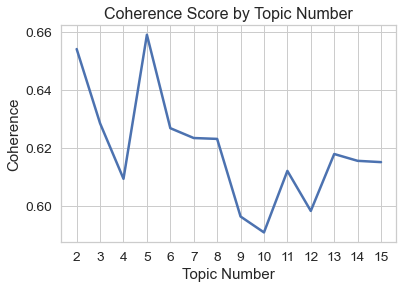

In [24]:
plt.plot(coherence_scores)
plt.xticks(range(0,len(Topics)),Topics)
plt.title('Coherence Score by Topic Number', fontsize=16)
plt.xlabel('Topic Number')
plt.ylabel('Coherence')

In [25]:
import numpy
lda_model = Trained_Models[numpy.argmax(coherence_scores)]
#Show top 10 words in each topic
lda_model.show_topics(num_words=10)

[(0,
  '0.056*"friendliness" + 0.046*"choir" + 0.046*"meeting" + 0.036*"friends" + 0.035*"time" + 0.035*"course" + 0.035*"range" + 0.035*"friendships" + 0.025*"community" + 0.024*"singing"'),
 (1,
  '0.120*"songs" + 0.060*"community" + 0.047*"variety" + 0.033*"choir" + 0.028*"members" + 0.028*"sense" + 0.028*"diversity" + 0.024*"cath" + 0.024*"dillon" + 0.024*"enthusiasm"'),
 (2,
  '0.065*"music" + 0.056*"group" + 0.055*"feel" + 0.047*"leader" + 0.038*"opportunity" + 0.037*"voice" + 0.029*"variety" + 0.029*"sing" + 0.020*"community" + 0.020*"members"'),
 (3,
  '0.062*"members" + 0.062*"choir" + 0.054*"group" + 0.036*"week" + 0.036*"music" + 0.036*"chance" + 0.028*"friends" + 0.028*"supper" + 0.027*"energy" + 0.023*"friendship"'),
 (4,
  '0.070*"group" + 0.037*"community" + 0.036*"inclusiveness" + 0.036*"meeting" + 0.036*"friends" + 0.035*"enjoyment" + 0.025*"sense" + 0.025*"friendliness" + 0.025*"energy" + 0.025*"dillon"')]

In [26]:
#4.5/ LDA Model
#Train LDA Model with 5 topics
from sklearn.decomposition import LatentDirichletAllocation as LDA
# Tweak the two parameters below
number_topics = 5
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_

array([[ 0.2000221 ,  1.52908812,  2.1999298 ,  0.20002001,  0.20003961,
         2.19990749,  2.19835402,  1.19829065,  0.20005053,  0.20002   ,
         2.09952591,  0.2000377 ,  1.20231649,  6.19949224,  0.20004132,
         2.21797918,  0.20003323,  2.2041999 ,  5.41529118,  0.20001661,
         0.20136162,  0.20007159,  0.20002749,  1.1944759 ,  0.20002468,
         0.20003547,  1.19800106,  0.20002693,  0.20002563,  0.20101496,
         0.20003848,  0.20003418,  0.20170382,  1.18176728,  0.20003269,
         0.20004387,  1.20176076,  0.20003379,  0.20001231,  0.20000656,
         1.89231759,  0.20004571,  0.20005742,  0.2000276 ,  7.19924189,
         0.20002823,  0.20004273,  3.21074266,  0.20032824,  0.20003868,
         1.19905226,  1.19540636,  2.19990805,  0.20132821,  1.19837484,
         0.20003632,  2.19992287,  0.20003303,  0.20105104,  0.20003535,
         2.19991603,  0.20003621,  0.20003148,  0.20002618,  0.20001693,
         0.20002305,  3.21166124,  0.20094963,  2.1

In [27]:
#Word Probablities by Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

[[0.00191351 0.01462799 0.02104558 0.00191349 0.00191367 0.02104537
  0.02103051 0.01146342 0.00191378 0.00191349 0.02008507 0.00191366
  0.01150194 0.05930731 0.00191369 0.02121825 0.00191361 0.02108643
  0.05180527 0.00191345 0.00192632 0.00191398 0.00191356 0.01142693
  0.00191353 0.00191364 0.01146065 0.00191355 0.00191354 0.00192301
  0.00191366 0.00191362 0.0019296  0.01130535 0.00191361 0.00191372
  0.01149662 0.00191362 0.00191341 0.00191336 0.01810282 0.00191373
  0.00191385 0.00191356 0.0688714  0.00191357 0.0019137  0.0307155
  0.00191644 0.00191367 0.01147071 0.01143583 0.02104537 0.001926
  0.01146423 0.00191364 0.02104552 0.00191361 0.00192335 0.00191363
  0.02104545 0.00191364 0.0019136  0.00191355 0.00191346 0.00191352
  0.03072429 0.00192238 0.02082853 0.030603   0.0019217  0.00191416
  0.00191343 0.00191351 0.00191387 0.00191364 0.00191367 0.00191359
  0.01146619 0.00191348 0.00191361 0.00191348 0.00191356 0.03076568
  0.00198231 0.00191362 0.01143931 0.00191354 0.001

In [28]:
#Extract and view the top words in each topic
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
friendliness : 0.069
cath : 0.059
voice : 0.058
choir : 0.052
skills : 0.031

Topic #1:
songs : 0.239
singing : 0.084
supper : 0.050
inclusiveness : 0.043
variety : 0.039

Topic #2:
group : 0.129
dillon : 0.076
leader : 0.062
music : 0.061
diversity : 0.049

Topic #3:
friends : 0.106
members : 0.069
week : 0.064
variety : 0.061
meeting : 0.058

Topic #4:
community : 0.171
choir : 0.113
sense : 0.074
members : 0.055
time : 0.034


In [29]:
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords

,abilities,ability,acceptance,approach,atmosphere,attendance,attitude,auditions,backgrounds,blain,...,supportive,time,tips,variety,voice,voices,week,welcoming,work,year
0,0.001914,0.014628,0.021046,0.001913,0.001914,0.021045,0.021031,0.011463,0.001914,0.001913,...,0.001914,0.001914,0.011469,0.011359,0.058085,0.001914,0.001914,0.001914,0.002889,0.021046
1,0.001670,0.001640,0.001640,0.018039,0.001640,0.001640,0.001640,0.001640,0.018057,0.018039,...,0.018038,0.001652,0.001640,0.039347,0.001647,0.001654,0.011789,0.001640,0.001640,0.001640
2,0.021681,0.033079,0.001358,0.001358,0.014940,0.001358,0.001358,0.001358,0.008134,0.001358,...,0.001358,0.008088,0.008156,0.001377,0.009010,0.001358,0.001362,0.014940,0.008158,0.001358
3,0.001616,0.001611,0.001611,0.001611,0.001611,0.001611,0.001618,0.001611,0.001611,0.001611,...,0.001611,0.001623,0.001611,0.061304,0.001617,0.001611,0.064121,0.001611,0.008789,0.001611
4,0.001637,0.001612,0.001612,0.001612,0.001612,0.001612,0.001617,0.009682,0.001612,0.001612,...,0.001612,0.033891,0.001612,0.001612,0.001612,0.017712,0.001617,0.001612,0.001656,0.001612


In [30]:
!pip install wordcloud

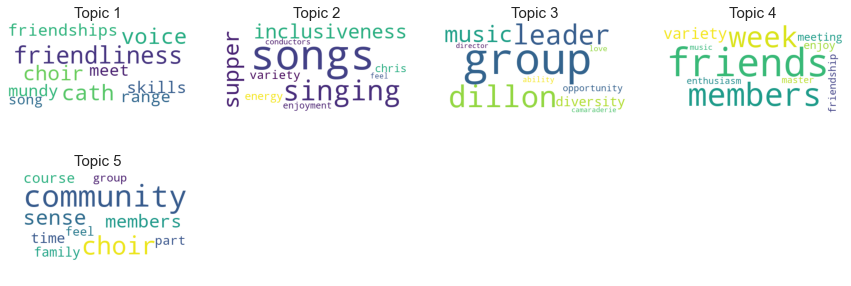

In [31]:
from wordcloud import WordCloud
import math
rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = plt.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Word_Topics_Pro):
 count_dict = (zip(ReducedTerm, topic))
 count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
 # convert to dictionary type - keep top 10 words
 Word_Frequency = dict(count_dict[0:10])
 # generate word cloud
 wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
 # visualize word cloud in figure
 subfig_Row = math.floor(topic_idx/4)
 subfig_Col = math.ceil(topic_idx%4)
 ax[subfig_Row,subfig_Col].imshow(wordcloud)
 ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1)) 
plt.show() 